<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Resampling lab

---


<h1>Lab Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Resampling-lab" data-toc-modified-id="Resampling-lab-1">Resampling lab</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Load-the-AAPL-data-from-the-datasets-folder" data-toc-modified-id="Load-the-AAPL-data-from-the-datasets-folder-1.0.1">Load the AAPL data from the datasets folder</a></span></li><li><span><a href="#Sort-the-rows-by-Date-in-ascending-order" data-toc-modified-id="Sort-the-rows-by-Date-in-ascending-order-1.0.2">Sort the rows by <code>Date</code> in ascending order</a></span></li><li><span><a href="#Transform-the-Date-column-into-DateTime-format." data-toc-modified-id="Transform-the-Date-column-into-DateTime-format.-1.0.3">Transform the <code>Date</code> column into DateTime format.</a></span></li><li><span><a href="#Make-the-Date-column-the-index-of-the-DataFrame." data-toc-modified-id="Make-the-Date-column-the-index-of-the-DataFrame.-1.0.4">Make the <code>Date</code> column the index of the DataFrame.</a></span></li><li><span><a href="#Resample-the-time-series-to-report-weekly-or-annual-means." data-toc-modified-id="Resample-the-time-series-to-report-weekly-or-annual-means.-1.0.5">Resample the time series to report weekly or annual means.</a></span></li><li><span><a href="#Plot-the-timeseries-of-weekly-resampled-means-for-'Open','High','Low','Close'-and-compare-to-the-original-timeseries." data-toc-modified-id="Plot-the-timeseries-of-weekly-resampled-means-for-'Open','High','Low','Close'-and-compare-to-the-original-timeseries.-1.0.6">Plot the timeseries of weekly resampled means for <code>'Open','High','Low','Close'</code> and compare to the original timeseries.</a></span></li><li><span><a href="#Rolling-windows" data-toc-modified-id="Rolling-windows-1.0.7">Rolling windows</a></span><ul class="toc-item"><li><span><a href="#Test-different-window-sizes-and-frequencies." data-toc-modified-id="Test-different-window-sizes-and-frequencies.-1.0.7.1">Test different window sizes and frequencies.</a></span></li><li><span><a href="#Plot-the-time-series-across-the-moving-window" data-toc-modified-id="Plot-the-time-series-across-the-moving-window-1.0.7.2">Plot the time series across the moving window</a></span></li></ul></li><li><span><a href="#Use-.diff()-to-calculate-changes-in-values-from-day-to-day" data-toc-modified-id="Use-.diff()-to-calculate-changes-in-values-from-day-to-day-1.0.8">Use <code>.diff()</code> to calculate changes in values from day to day</a></span></li><li><span><a href="#What-is-the-difference-between-applying-.diff(2)-and-.diff().diff()?" data-toc-modified-id="What-is-the-difference-between-applying-.diff(2)-and-.diff().diff()?-1.0.9">What is the difference between applying <code>.diff(2)</code> and <code>.diff().diff()</code>?</a></span></li><li><span><a href="#Use-df.pct_change()-to-calculate-percent-changes-from-day-to-day" data-toc-modified-id="Use-df.pct_change()-to-calculate-percent-changes-from-day-to-day-1.0.10">Use <code>df.pct_change()</code> to calculate percent changes from day to day</a></span></li><li><span><a href="#Shifting" data-toc-modified-id="Shifting-1.0.11">Shifting</a></span></li><li><span><a href="#Undoing-differencing" data-toc-modified-id="Undoing-differencing-1.0.12">Undoing differencing</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

### Load the AAPL data from the datasets folder


- `Close`: The price of AAPL when the stock market closes (at 4:30pm ET)
- `High`: The highest price of AAPL during that trading day
- `Low`: The lowest price of AAPL during that trading day
- `Open`: The price of AAPL when the stock market opens (at 9:30am ET)
- `Volume`: How many shares of AAPL were traded that day

In [2]:
df = pd.read_csv('./datasets/aapl.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Volume
0,2017-01-13,119.11,119.62,118.81,119.04,26111948
1,2017-01-12,118.90,119.30,118.21,119.25,27086220
2,2017-01-11,118.74,119.93,118.60,119.75,27588593
3,2017-01-10,118.77,119.38,118.30,119.11,24462051
4,2017-01-09,117.95,119.43,117.94,118.99,33561948


### Sort the rows by `Date` in ascending order

In [6]:
df = df.sort_values('Date')

In [8]:
df.reset_index(drop=True, inplace=True)

In [9]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2016-01-19,98.41,98.65,95.50,96.66,52841349
1,2016-01-20,95.10,98.19,93.42,96.79,72008265
2,2016-01-21,97.06,97.88,94.94,96.30,52054521
3,2016-01-22,98.63,101.46,98.37,101.42,65562769
4,2016-01-25,101.52,101.53,99.21,99.44,51196375


### Make the `Date` column the index of the DataFrame.

Making the index a datetime allows us to easily order the data by time. Doing this will result in dataframe objects indexed by DateTime - literally Time Series!

In [10]:
df.set_index('Date', inplace=True, drop=True)

In [11]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-19,98.41,98.65,95.50,96.66,52841349
2016-01-20,95.10,98.19,93.42,96.79,72008265
2016-01-21,97.06,97.88,94.94,96.30,52054521
2016-01-22,98.63,101.46,98.37,101.42,65562769
2016-01-25,101.52,101.53,99.21,99.44,51196375


### Resample the time series to report weekly or annual means.

Applying `.resample(freq)` to a pandas timeseries with a specified frequency, e.g. `'W'` or `'A'`, followed by an aggregation function like `.mean()`, creates aggregates across the indicated frequency (similar to `group by`).

In [16]:
# W = week , M = month , A = year
df.resample('M').count()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-31,9,9,9,9,9
2016-02-29,20,20,20,20,20
2016-03-31,22,22,22,22,22
2016-04-30,21,21,21,21,21
2016-05-31,21,21,21,21,21
2016-06-30,22,22,22,22,22
2016-07-31,20,20,20,20,20
2016-08-31,23,23,23,23,23
2016-09-30,21,21,21,21,21


In [19]:
df.resample('M').apply([pd.DataFrame.mean,pd.DataFrame.std])
#or
#df.resample('M').apply([pd.DataFrame.mean,pd.DataFrame.std]).T

Open                  High                   Low            \
                  mean       std        mean       std        mean       std   
Date                                                                           
2016-01-31   97.252222  2.569318   98.564444  2.365254   95.510000  2.472479   
2016-02-29   95.696000  1.363434   96.727500  1.093463   94.711500  1.248841   
2016-03-31  103.816818  2.938897  104.897273  2.928403  103.231364  2.989582   
2016-04-30  106.785714  5.072763  107.759048  4.987858  105.855238  5.340538   
2016-05-31   94.958095  2.594118   95.694762  2.706484   94.048571  2.831952   
2016-06-30   96.588636  2.096887   97.477727  2.258792   95.969091  2.185792   
2016-07-31   98.450500  2.773454   99.163500  2.760803   98.002500  2.665824   
2016-08-31  107.462609  1.515283  108.140435  1.367624  106.986522  1.503721   
2016-09-30  110.673333  3.807178  111.745238  3.655234  109.807619  3.703923   
2016-10-31  115.743810  1.878916  116.388095  1.785574  114.941429  1.820652   
2016-11-30  110.098571  1.837151  111.068095  1.527245  108.988571  2.066144   
2016-12-31  113.995238  2.966748  115.025238  2.864145  113.544762  3.085880   
2017-01-31  117.535556  1.437055  118.391111  1.455425  117.183333  1.493670   

                 Close                  Volume                
                  mean       std          mean           std  
Date                                                          
2016-01-31   97.272222  2.641329  6.766593e+07  2.525580e+07  
2016-02-29   95.746500  1.241638  4.016202e+07  7.089712e+06  
2016-03-31  104.267273  2.789685  3.367371e+07  7.884012e+06  
2016-04-30  106.739048  5.246970  4.038861e+07  2.282708e+07  
2016-05-31   94.974762  3.032436  4.268420e+07  1.169373e+07  
2016-06-30   96.622273  2.073975  3.548319e+07  1.243827e+07  
2016-07-31   98.556500  2.733092  3.428898e+07  1.579215e+07  
2016-08-31  107.665217  1.414702  2.739689e+07  5.158249e+06  
2016-09-30  110.857143  3.697138  4.617282e+07  2.309382e+07  
2016-10-31  115.707143  1.878135  3.271020e+07  1.295605e+07  
2016-11-30  110.154286  1.697308  3.432798e+07  1.258283e+07  
2016-12-31  114.335714  2.860174  2.898913e+07  9.009284e+06  
2017-01-31  118.092222  1.463103  2.696180e+07  4.093951e+06

### Plot the timeseries of weekly resampled means for `'Open','High','Low','Close'` and compare to the original timeseries.

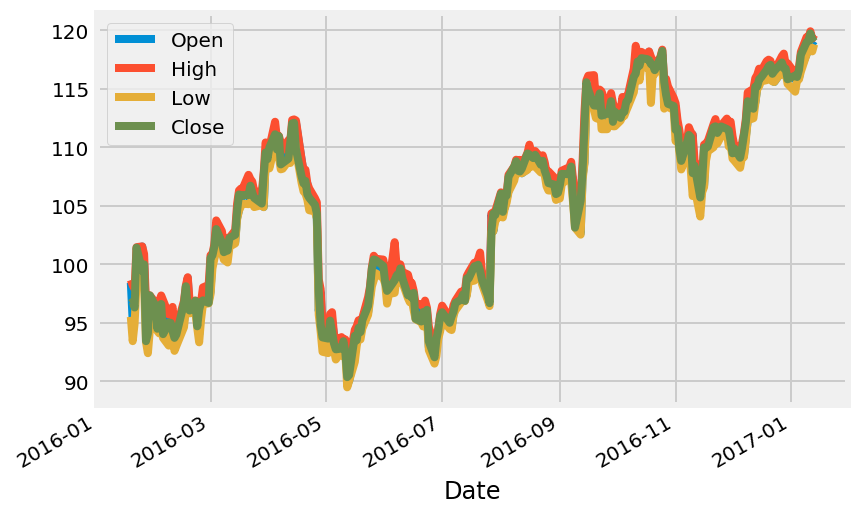

In [21]:
df[['Open','High','Low','Close']].plot()

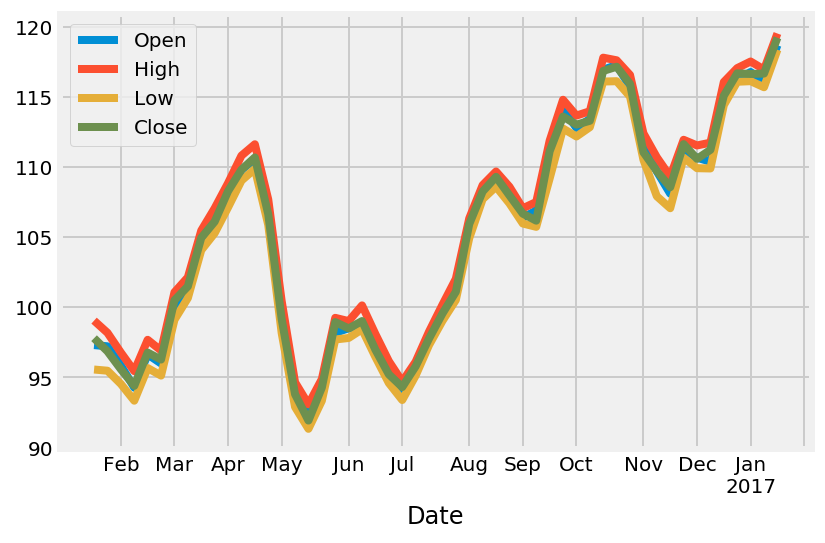

In [20]:
# resample = Groupby 
df.resample('W').mean()[['Open','High','Low','Close']].plot()

### Rolling windows

You can specify window sizes like

`df.rolling(window=7).mean()`

or 

`df.rolling(window='5D').mean()`.


The window function has the following parameters:

- **`window`** indicates the number of days to include in the average.
- **`center`** indicates whether the window should be centered on the date or use data prior to that date.
- **`freq`** indicates which level to roll the averages up to (as used in **`resample`**): **`D`** for day, **`M`** for month, **`A`** for year, etc.

> **Note:** For more information, see Pandas' [resample documentation](http://stackoverflow.com/questions/17001389/pandas-resample-documentation).

#### Test different window sizes and frequencies. 

- Why are there missing values?
- Test the different options for `center`.

In [29]:
df.rolling(window=7).mean().head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-19,NaN,NaN,NaN,NaN,NaN
2016-01-20,NaN,NaN,NaN,NaN,NaN
2016-01-21,NaN,NaN,NaN,NaN,NaN
2016-01-22,NaN,NaN,NaN,NaN,NaN
2016-01-25,NaN,NaN,NaN,NaN,NaN
2016-01-26,NaN,NaN,NaN,NaN,NaN
2016-01-27,98.098571,99.317143,96.121429,97.717143,6.991801e+07
2016-01-28,97.438571,98.727143,95.677143,97.350000,7.030598e+07
2016-01-29,97.394286,98.605714,95.810000,97.428571,6.916339e+07


In [36]:
df.rolling(window=7).count().head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-19,1.0,1.0,1.0,1.0,1.0
2016-01-20,2.0,2.0,2.0,2.0,2.0
2016-01-21,3.0,3.0,3.0,3.0,3.0
2016-01-22,4.0,4.0,4.0,4.0,4.0
2016-01-25,5.0,5.0,5.0,5.0,5.0


In [30]:
# window of 5 days
df.rolling(window='5D').mean().head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-19,98.410000,98.650,95.500000,96.660000,5.284135e+07
2016-01-20,96.755000,98.420,94.460000,96.725000,6.242481e+07
2016-01-21,96.856667,98.240,94.620000,96.583333,5.896804e+07
2016-01-22,97.300000,99.045,95.557500,97.792500,6.061673e+07
2016-01-25,99.070000,100.290,97.506667,99.053333,5.627122e+07


In [33]:
df.rolling(window='5D').count().head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-19,1.0,1.0,1.0,1.0,1.0
2016-01-20,2.0,2.0,2.0,2.0,2.0
2016-01-21,3.0,3.0,3.0,3.0,3.0
2016-01-22,4.0,4.0,4.0,4.0,4.0
2016-01-25,3.0,3.0,3.0,3.0,3.0


#### Plot the time series across the moving window

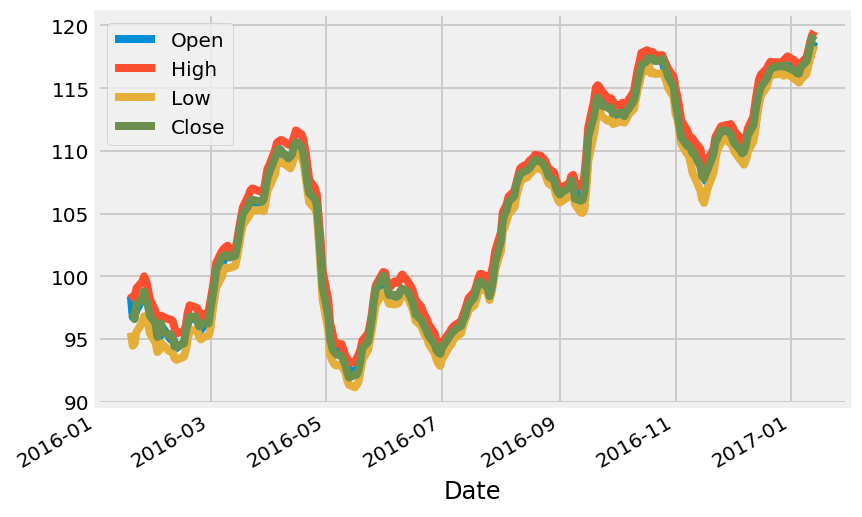

In [38]:
# 7 days moving avarage
df[['Open','High','Low','Close']].rolling(window='7D').mean().plot()

### Use `.diff()` to calculate changes in values from day to day

- Why do you get missing values?
- Plot the resulting time series. Compare to the original time series.

In [47]:
df.diff().head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-19,NaN,NaN,NaN,NaN,NaN
2016-01-20,-3.31,-0.46,-2.08,0.13,19166916.0
2016-01-21,1.96,-0.31,1.52,-0.49,-19953744.0
2016-01-22,1.57,3.58,3.43,5.12,13508248.0
2016-01-25,2.89,0.07,0.84,-1.98,-14366394.0


### What is the difference between applying `.diff(2)` and `.diff().diff()`?

In [49]:
df.diff().diff().head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-19,NaN,NaN,NaN,NaN,NaN
2016-01-20,NaN,NaN,NaN,NaN,NaN
2016-01-21,5.27,0.15,3.60,-0.62,-39120660.0
2016-01-22,-0.39,3.89,1.91,5.61,33461992.0
2016-01-25,1.32,-3.51,-2.59,-7.10,-27874642.0


In [48]:
(df - df.shift()).head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-19,NaN,NaN,NaN,NaN,NaN
2016-01-20,-3.31,-0.46,-2.08,0.13,19166916.0
2016-01-21,1.96,-0.31,1.52,-0.49,-19953744.0
2016-01-22,1.57,3.58,3.43,5.12,13508248.0
2016-01-25,2.89,0.07,0.84,-1.98,-14366394.0


### Use `df.pct_change()` to calculate percent changes from day to day

- Plot the resulting time series. Compare to the original time series.

### Shifting

`df.shift()` is used to bring values from previous dates forward in time.

- How is that different from `.diff()`?

### Undoing differencing

What would you do to reobtain the original time series after having applied `.diff()`?

In [50]:
df_diff = df.diff()

In [51]:
# you can use only the first cloumn and apply the diff on it
df_diff.iloc[0,:] = df.iloc[0,:].values

In [57]:
df_fixed = df_diff.apply(np.cumsum)

In [58]:
df_fixed.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-19,98.41,98.65,95.50,96.66,52841349.0
2016-01-20,95.10,98.19,93.42,96.79,72008265.0
2016-01-21,97.06,97.88,94.94,96.30,52054521.0
2016-01-22,98.63,101.46,98.37,101.42,65562769.0
2016-01-25,101.52,101.53,99.21,99.44,51196375.0
